In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data, check base features

In [4]:
from sqlalchemy import create_engine
import os

DB_PATH = os.path.abspath("../databases/perovskites_data.db")

engine = create_engine(f"sqlite:///{DB_PATH}")
df = pd.read_sql("SELECT * FROM perovskites_data", engine)
df

composition_long_form composition_short_form  composition_inorganic  \
0                     MAPbI3                  MAPbI                    0.0   
1                     FAPbI3                  FAPbI                    0.0   
2              MAPbBr0.3I2.9                MAPbBrI                    0.0   
3      FA0.1MA0.9PbBr0.3I2.9              FAMAPbBrI                    0.0   
4                    MAPbBr3                 MAPbBr                    0.0   
..                       ...                    ...                    ...   
194              MAPb1.0BrI2                MAPbBrI                    0.0   
195              MAPb1.0ClI2                MAPbClI                    0.0   
196  FA0.3MA0.7PbBr0.45I2.55              FAMAPbBrI                    0.0   
197    MAPb(Br0.7I0.3)xCl3-x                MAPbBrI                    0.0   
198              MAPbI3-xClx                  MAPbI                    0.0   

     band_gap A_1   A_2   A_3  A_1_coef  A_2_coef  A_3_coef  ... C_1_coef  \
0       1.600  MA  None  None       1.0       NaN       NaN  ...     3.00   
1       1.500  FA  None  None       1.0       NaN       NaN  ...     3.00   
2       1.589  MA  None  None       1.0       NaN       NaN  ...     0.30   
3       1.592  FA    MA  None       0.1       0.9       NaN  ...     0.30   
4       2.300  MA  None  None       1.0       NaN       NaN  ...     3.00   
..        ...  ..   ...   ...       ...       ...       ...  ...      ...   
194     1.600  MA  None  None       1.0       NaN       NaN  ...     1.00   
195     2.700  MA  None  None       1.0       NaN       NaN  ...     1.00   
196     1.660  FA    MA  None       0.3       0.7       NaN  ...     0.45   
197     1.970  MA  None  None       1.0       NaN       NaN  ...     2.10   
198     2.900  MA  None  None       1.0       NaN       NaN  ...     3.00   

    C_2_coef  dimension  dimension_list_of_layers       r_A       r_B  \
0        NaN         3D                       3.0  0.723333  0.396667   
1        NaN         3D                       3.0  0.843333  0.396667   
2       2.90         3D                       3.0  0.723333  0.396667   
3       2.90         3D                       3.0  0.735333  0.396667   
4        NaN         3D                       3.0  0.723333  0.396667   
..       ...        ...                       ...       ...       ...   
194     2.00         3D                       3.0  0.723333  0.396667   
195     2.00         3D                       3.0  0.723333  0.396667   
196     2.55         3D                       3.0  0.759333  0.396667   
197     0.90         3D                       3.0  0.723333  0.396667   
198      NaN         3D                       3.0  0.723333  0.396667   

          r_C  tolerance_factor octahedral_factor  space_group  
0    2.200000          0.796062          0.180303         Pnma  
1    2.200000          0.828740          0.180303       I4/mcm  
2    2.322667          0.792050          0.170781         Pnma  
3    2.322667          0.795170          0.170781         Pnma  
4    1.960000          0.805122          0.202381       I4/mcm  
..        ...               ...               ...          ...  
194  2.120000          0.798890          0.187107         Pnma  
195  2.070000          0.800751          0.191626       I4/mcm  
196  2.164000          0.807254          0.183303       I4/mcm  
197  2.032000          0.802216          0.195210       I4/mcm  
198  2.200000          0.796062          0.180303         Pnma  

[199 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   composition_long_form     199 non-null    object 
 1   composition_short_form    199 non-null    object 
 2   composition_inorganic     199 non-null    float64
 3   band_gap                  199 non-null    float64
 4   A_1                       199 non-null    object 
 5   A_2                       104 non-null    object 
 6   A_3                       3 non-null      object 
 7   A_1_coef                  199 non-null    float64
 8   A_2_coef                  104 non-null    float64
 9   A_3_coef                  3 non-null      float64
 10  B_1                       199 non-null    object 
 11  B_2                       1 non-null      object 
 12  B_1_coef                  199 non-null    float64
 13  B_2_coef                  1 non-null      float64
 14  C_1       

### Check ions in all sites by countplot

In [6]:
def count_ions(_df: pd.DataFrame, site_prefix: str):
    site_cols = [col for col in _df.columns if col.startswith(site_prefix) and "coef" not in col]
    all_ions = _df[site_cols].stack().reset_index(drop=True)
    return all_ions.value_counts()

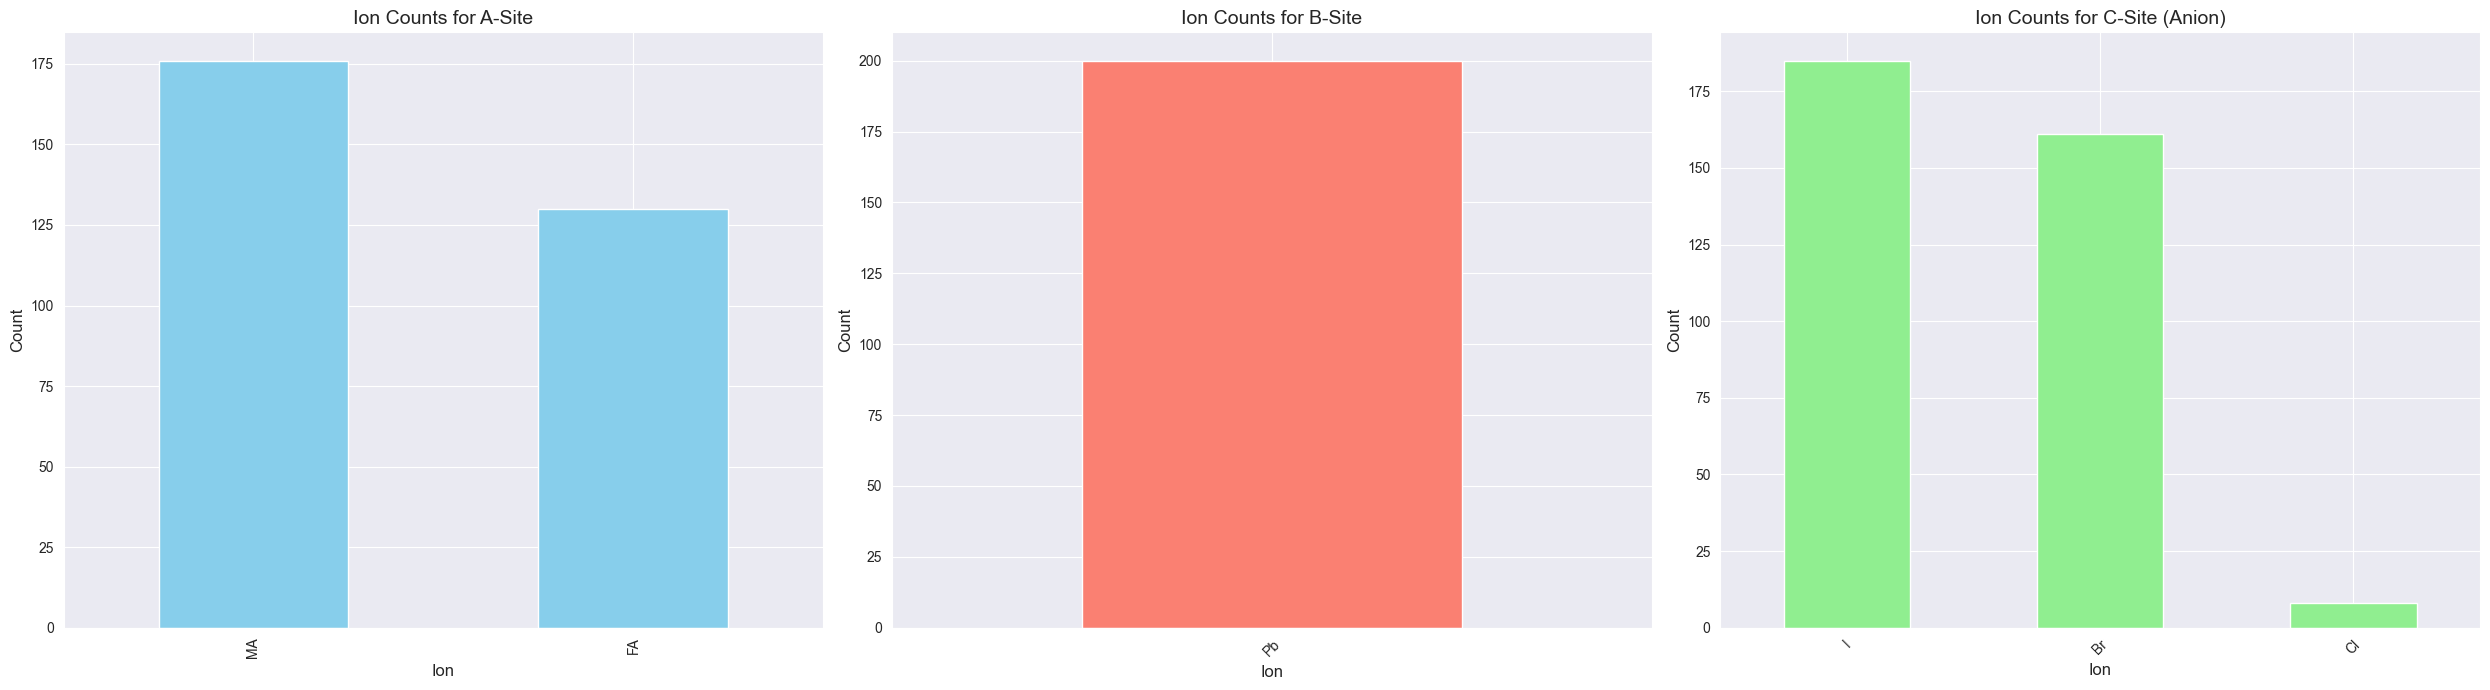

In [7]:
site_cols = [col for col in df.columns if col[-1].isdigit() and "coef" not in col]
for col in site_cols:
    df[col] = df[col].str.strip()

a_site_ion_count = count_ions(df, "A")
b_site_ion_count = count_ions(df, "B")
c_site_ion_count = count_ions(df, "C")

fig, axes = plt.subplots(1, 3, figsize=(25, 7))

a_site_ion_count.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Ion Counts for A-Site', fontsize=14)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xlabel('Ion', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

b_site_ion_count.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Ion Counts for B-Site', fontsize=14)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xlabel('Ion', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

c_site_ion_count.plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Ion Counts for C-Site (Anion)', fontsize=14)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].set_xlabel('Ion', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### We need to filter only for`
- A-site -> MA, FA
- B-site -> Pb
- C-site -> I, Br, Cl

#### Feature engineering - enrich data with factors

In [10]:
from perovskite_prediction_api.features import structure_features, calc_factors
from perovskite_prediction_api.entities.dictionary_api import Site

df["r_A"] = df.apply(lambda row: structure_features.calculate_effective_radii_for_site(row, Site.A),
                                       axis=1)
df["r_B"] = df.apply(lambda row: structure_features.calculate_effective_radii_for_site(row, Site.B),
                                       axis=1)
df["r_C"] = df.apply(lambda row: structure_features.calculate_effective_radii_for_site(row, Site.C),
                                       axis=1)

df["tolerance_factor"] = df.apply(
    lambda row: calc_factors.compute_tolerance_factor(row["r_A"], row["r_B"], row["r_C"]), axis=1)
df["octahedral_factor"] = df.apply(
    lambda row: calc_factors.compute_octahedral_factor(row["r_B"], row["r_C"]), axis=1)
df

composition_long_form composition_short_form  composition_inorganic  \
0                     MAPbI3                  MAPbI                    0.0   
1                     FAPbI3                  FAPbI                    0.0   
2              MAPbBr0.3I2.9                MAPbBrI                    0.0   
3      FA0.1MA0.9PbBr0.3I2.9              FAMAPbBrI                    0.0   
4                    MAPbBr3                 MAPbBr                    0.0   
..                       ...                    ...                    ...   
194              MAPb1.0BrI2                MAPbBrI                    0.0   
195              MAPb1.0ClI2                MAPbClI                    0.0   
196  FA0.3MA0.7PbBr0.45I2.55              FAMAPbBrI                    0.0   
197    MAPb(Br0.7I0.3)xCl3-x                MAPbBrI                    0.0   
198              MAPbI3-xClx                  MAPbI                    0.0   

     band_gap A_1   A_2   A_3  A_1_coef  A_2_coef  A_3_coef  ... C_1_coef  \
0       1.600  MA  None  None       1.0       NaN       NaN  ...     3.00   
1       1.500  FA  None  None       1.0       NaN       NaN  ...     3.00   
2       1.589  MA  None  None       1.0       NaN       NaN  ...     0.30   
3       1.592  FA    MA  None       0.1       0.9       NaN  ...     0.30   
4       2.300  MA  None  None       1.0       NaN       NaN  ...     3.00   
..        ...  ..   ...   ...       ...       ...       ...  ...      ...   
194     1.600  MA  None  None       1.0       NaN       NaN  ...     1.00   
195     2.700  MA  None  None       1.0       NaN       NaN  ...     1.00   
196     1.660  FA    MA  None       0.3       0.7       NaN  ...     0.45   
197     1.970  MA  None  None       1.0       NaN       NaN  ...     2.10   
198     2.900  MA  None  None       1.0       NaN       NaN  ...     3.00   

    C_2_coef  dimension  dimension_list_of_layers       r_A       r_B  \
0        NaN         3D                       3.0  0.723333  0.396667   
1        NaN         3D                       3.0  0.843333  0.396667   
2       2.90         3D                       3.0  0.723333  0.396667   
3       2.90         3D                       3.0  0.735333  0.396667   
4        NaN         3D                       3.0  0.723333  0.396667   
..       ...        ...                       ...       ...       ...   
194     2.00         3D                       3.0  0.723333  0.396667   
195     2.00         3D                       3.0  0.723333  0.396667   
196     2.55         3D                       3.0  0.759333  0.396667   
197     0.90         3D                       3.0  0.723333  0.396667   
198      NaN         3D                       3.0  0.723333  0.396667   

          r_C  tolerance_factor octahedral_factor  space_group  
0    2.200000          0.796062          0.180303         Pnma  
1    2.200000          0.828740          0.180303       I4/mcm  
2    2.322667          0.792050          0.170781         Pnma  
3    2.322667          0.795170          0.170781         Pnma  
4    1.960000          0.805122          0.202381       I4/mcm  
..        ...               ...               ...          ...  
194  2.120000          0.798890          0.187107         Pnma  
195  2.070000          0.800751          0.191626       I4/mcm  
196  2.164000          0.807254          0.183303       I4/mcm  
197  2.032000          0.802216          0.195210       I4/mcm  
198  2.200000          0.796062          0.180303         Pnma  

[199 rows x 26 columns]

### Plot features

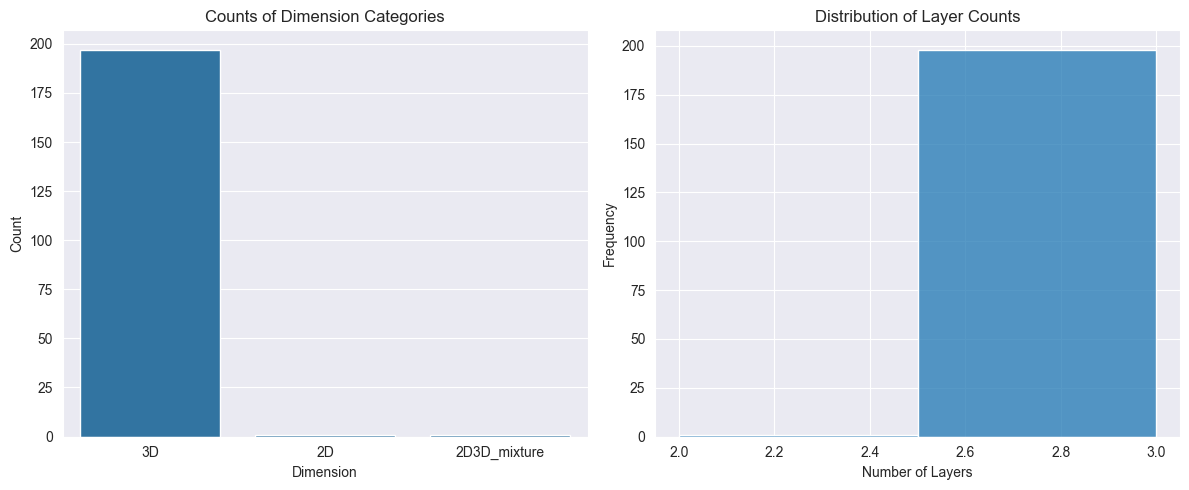

In [11]:
dimension_columns = ["dimension", "dimension_list_of_layers"]
dimension_info_df = df[dimension_columns]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=dimension_info_df, x="dimension", ax=axes[0])
axes[0].set_title("Counts of Dimension Categories")
axes[0].set_xlabel("Dimension")
axes[0].set_ylabel("Count")

sns.histplot(data=dimension_info_df, x="dimension_list_of_layers",
             bins=len(dimension_info_df["dimension_list_of_layers"].unique()), ax=axes[1])
axes[1].set_title("Distribution of Layer Counts")
axes[1].set_xlabel("Number of Layers")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [13]:
# get space group
from perovskite_prediction_api.features.structure_features import compute_space_group

df["space_group"] = df.apply(
    lambda row: compute_space_group(
        row["tolerance_factor"], row["dimension"], bool(row["composition_inorganic"])
    ),
    axis=1
)
df = df[df["space_group"] != "Unknown"]
df


composition_long_form composition_short_form  composition_inorganic  \
0                     MAPbI3                  MAPbI                    0.0   
1                     FAPbI3                  FAPbI                    0.0   
2              MAPbBr0.3I2.9                MAPbBrI                    0.0   
3      FA0.1MA0.9PbBr0.3I2.9              FAMAPbBrI                    0.0   
4                    MAPbBr3                 MAPbBr                    0.0   
..                       ...                    ...                    ...   
194              MAPb1.0BrI2                MAPbBrI                    0.0   
195              MAPb1.0ClI2                MAPbClI                    0.0   
196  FA0.3MA0.7PbBr0.45I2.55              FAMAPbBrI                    0.0   
197    MAPb(Br0.7I0.3)xCl3-x                MAPbBrI                    0.0   
198              MAPbI3-xClx                  MAPbI                    0.0   

     band_gap A_1   A_2   A_3  A_1_coef  A_2_coef  A_3_coef  ... C_1_coef  \
0       1.600  MA  None  None       1.0       NaN       NaN  ...     3.00   
1       1.500  FA  None  None       1.0       NaN       NaN  ...     3.00   
2       1.589  MA  None  None       1.0       NaN       NaN  ...     0.30   
3       1.592  FA    MA  None       0.1       0.9       NaN  ...     0.30   
4       2.300  MA  None  None       1.0       NaN       NaN  ...     3.00   
..        ...  ..   ...   ...       ...       ...       ...  ...      ...   
194     1.600  MA  None  None       1.0       NaN       NaN  ...     1.00   
195     2.700  MA  None  None       1.0       NaN       NaN  ...     1.00   
196     1.660  FA    MA  None       0.3       0.7       NaN  ...     0.45   
197     1.970  MA  None  None       1.0       NaN       NaN  ...     2.10   
198     2.900  MA  None  None       1.0       NaN       NaN  ...     3.00   

    C_2_coef  dimension  dimension_list_of_layers       r_A       r_B  \
0        NaN         3D                       3.0  0.723333  0.396667   
1        NaN         3D                       3.0  0.843333  0.396667   
2       2.90         3D                       3.0  0.723333  0.396667   
3       2.90         3D                       3.0  0.735333  0.396667   
4        NaN         3D                       3.0  0.723333  0.396667   
..       ...        ...                       ...       ...       ...   
194     2.00         3D                       3.0  0.723333  0.396667   
195     2.00         3D                       3.0  0.723333  0.396667   
196     2.55         3D                       3.0  0.759333  0.396667   
197     0.90         3D                       3.0  0.723333  0.396667   
198      NaN         3D                       3.0  0.723333  0.396667   

          r_C  tolerance_factor octahedral_factor  space_group  
0    2.200000          0.796062          0.180303         Pnma  
1    2.200000          0.828740          0.180303       I4/mcm  
2    2.322667          0.792050          0.170781         Pnma  
3    2.322667          0.795170          0.170781         Pnma  
4    1.960000          0.805122          0.202381       I4/mcm  
..        ...               ...               ...          ...  
194  2.120000          0.798890          0.187107         Pnma  
195  2.070000          0.800751          0.191626       I4/mcm  
196  2.164000          0.807254          0.183303       I4/mcm  
197  2.032000          0.802216          0.195210       I4/mcm  
198  2.200000          0.796062          0.180303         Pnma  

[199 rows x 26 columns]

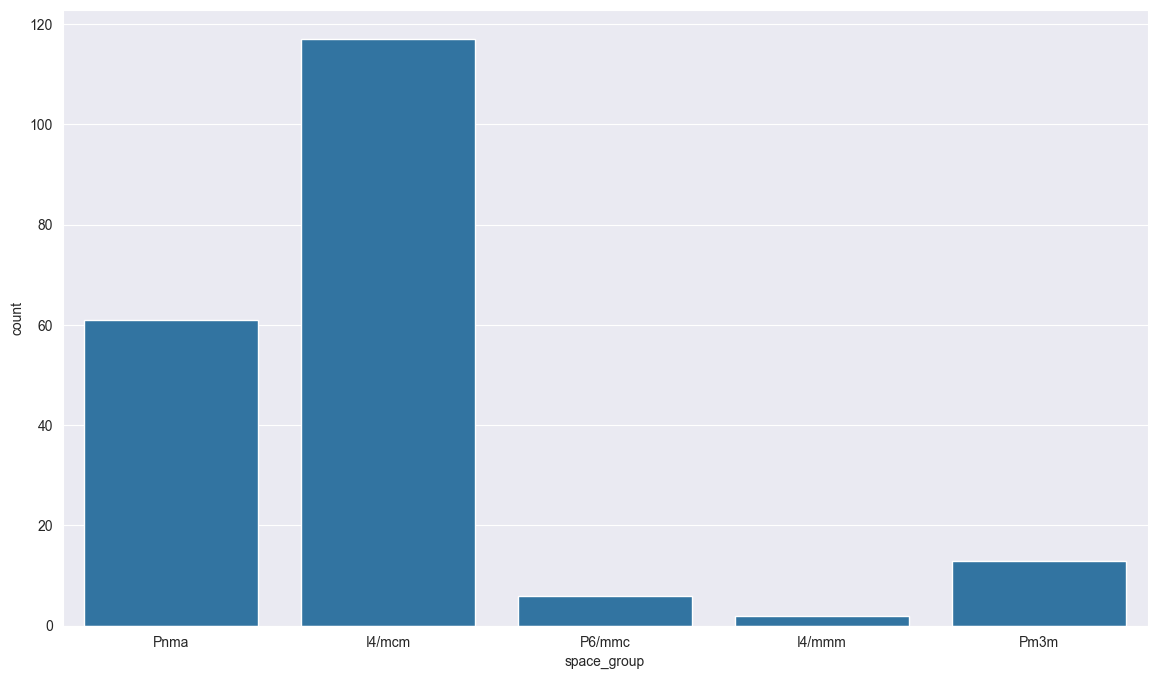

In [14]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x="space_group")
plt.show()

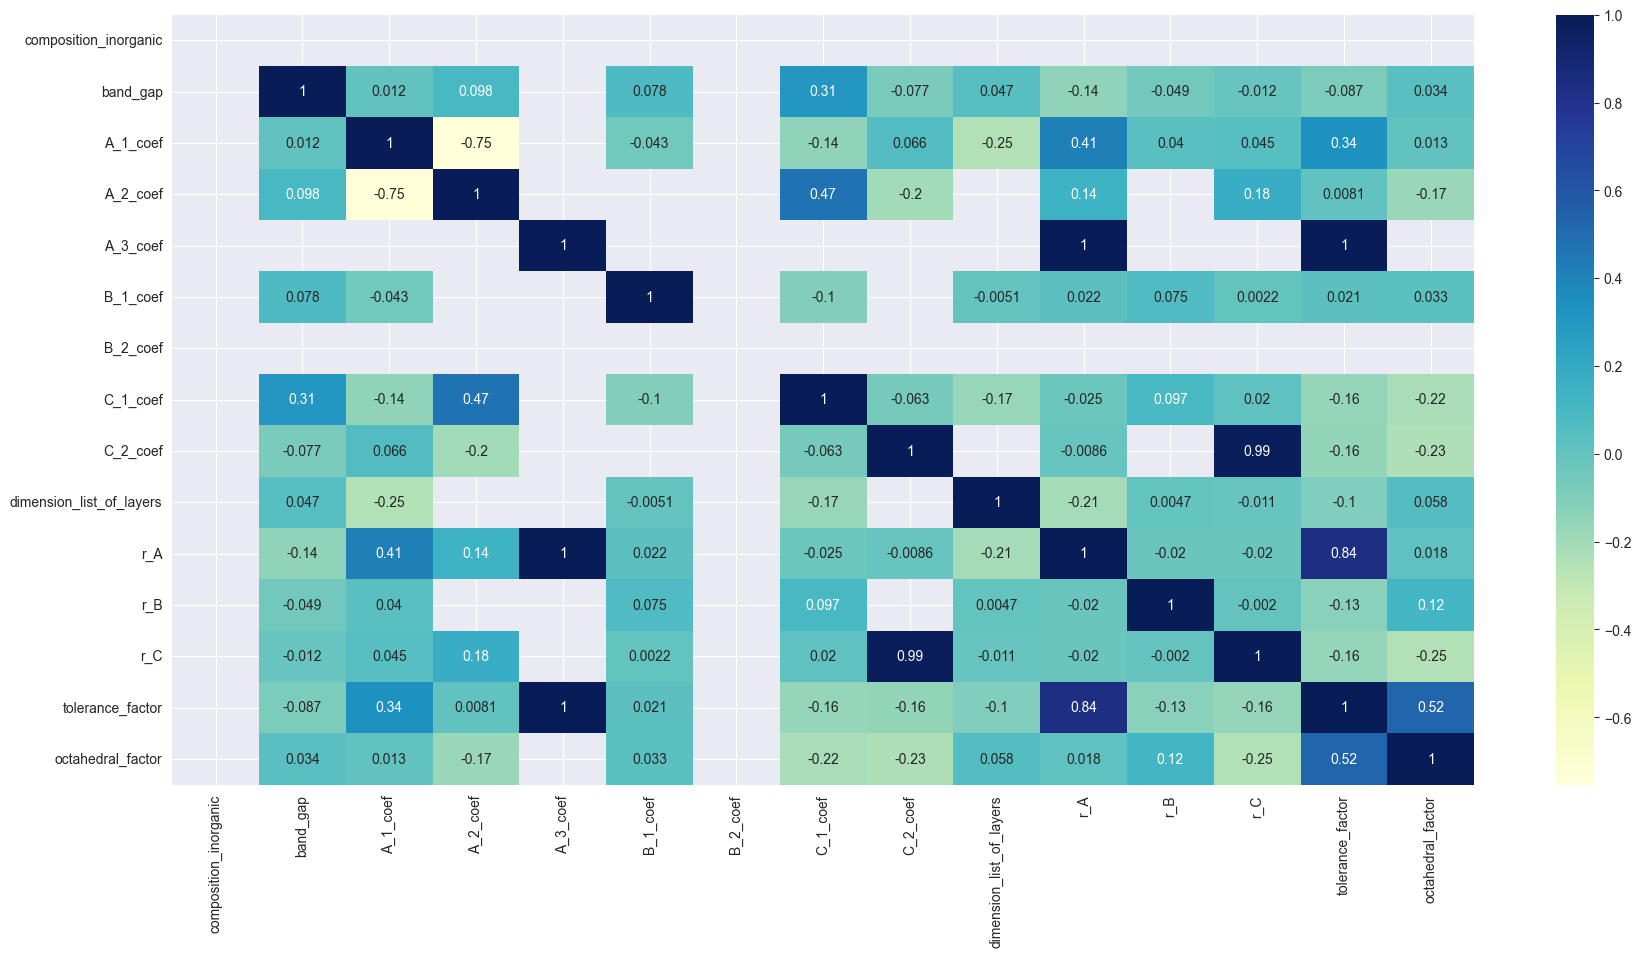

In [15]:
num_df_cols = [col for col in df.columns if df[col].dtype != "object"]
plt.figure(figsize=(21, 10))
sns.heatmap(df[num_df_cols].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [22]:
df_for_train = df.drop(columns=["composition_long_form", "composition_short_form"])
X, y = df_for_train.drop(columns=["band_gap"]), df_for_train["band_gap"]
X

composition_inorganic A_1   A_2   A_3  A_1_coef  A_2_coef  A_3_coef B_1  \
0                      0.0  MA  None  None       1.0       NaN       NaN  Pb   
1                      0.0  FA  None  None       1.0       NaN       NaN  Pb   
2                      0.0  MA  None  None       1.0       NaN       NaN  Pb   
3                      0.0  FA    MA  None       0.1       0.9       NaN  Pb   
4                      0.0  MA  None  None       1.0       NaN       NaN  Pb   
..                     ...  ..   ...   ...       ...       ...       ...  ..   
194                    0.0  MA  None  None       1.0       NaN       NaN  Pb   
195                    0.0  MA  None  None       1.0       NaN       NaN  Pb   
196                    0.0  FA    MA  None       0.3       0.7       NaN  Pb   
197                    0.0  MA  None  None       1.0       NaN       NaN  Pb   
198                    0.0  MA  None  None       1.0       NaN       NaN  Pb   

      B_2  B_1_coef  ...  C_1_coef C_2_coef dimension  \
0    None       1.0  ...      3.00      NaN        3D   
1    None       1.0  ...      3.00      NaN        3D   
2    None       1.0  ...      0.30     2.90        3D   
3    None       1.0  ...      0.30     2.90        3D   
4    None       1.0  ...      3.00      NaN        3D   
..    ...       ...  ...       ...      ...       ...   
194  None       1.0  ...      1.00     2.00        3D   
195  None       1.0  ...      1.00     2.00        3D   
196  None       1.0  ...      0.45     2.55        3D   
197  None       1.0  ...      2.10     0.90        3D   
198  None       1.0  ...      3.00      NaN        3D   

     dimension_list_of_layers       r_A       r_B       r_C  tolerance_factor  \
0                         3.0  0.723333  0.396667  2.200000          0.796062   
1                         3.0  0.843333  0.396667  2.200000          0.828740   
2                         3.0  0.723333  0.396667  2.322667          0.792050   
3                         3.0  0.735333  0.396667  2.322667          0.795170   
4                         3.0  0.723333  0.396667  1.960000          0.805122   
..                        ...       ...       ...       ...               ...   
194                       3.0  0.723333  0.396667  2.120000          0.798890   
195                       3.0  0.723333  0.396667  2.070000          0.800751   
196                       3.0  0.759333  0.396667  2.164000          0.807254   
197                       3.0  0.723333  0.396667  2.032000          0.802216   
198                       3.0  0.723333  0.396667  2.200000          0.796062   

     octahedral_factor  space_group  
0             0.180303         Pnma  
1             0.180303       I4/mcm  
2             0.170781         Pnma  
3             0.170781         Pnma  
4             0.202381       I4/mcm  
..                 ...          ...  
194           0.187107         Pnma  
195           0.191626       I4/mcm  
196           0.183303       I4/mcm  
197           0.195210       I4/mcm  
198           0.180303         Pnma  

[199 rows x 23 columns]

### Build model

In [32]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

numerical_features = [col for col in X.columns if X[col].dtype != np.object_]
categorical_features = [col for col in X.columns if col not in numerical_features]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])
xgb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['composition_inorganic',
                                                   'A_1_coef', 'A_2_coef',
                                                   'A_3_coef', 'B_1_coef',
                                                   'B_2_coef', 'C_1_coef',
                                                   'C_2_coef',
                                                   'dimension_list_of_layers',
                                                   'r_A', 'r_B', 'r_C',
                                                   'tolerance_factor',
                                                   'octahedral_factor']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncode...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [33]:
# get the best hyperparameters with GCV and build XGBoost Regressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

random_state = 42

param_grid = {
    "regressor__n_estimators": [300, 400, 500, 600, 700, 800],
    "regressor__learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9, 1.1],
    "regressor__min_child_weight": [0.05, 0.1, 0.3, 0.4, 0.5, 0.6, 0.8],
    "regressor__gamma": [0.05, 0.007, 0.009],
    "regressor__subsample": [0.4, 0.5, 0.6],
    "regressor__colsample_bytree": [0.6, 0.7, 0.8],
}

xgb = XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=random_state
)

search_cv = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
search_cv.fit(X_train, y_train)
model = search_cv.best_estimator_

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

results = {
    "best_params": search_cv.best_params_,
    "best_cv_score": search_cv.best_score_,
    "train_r2": train_r2,
    "test_r2": test_r2,
    "train_mse": train_mse,
    "test_mse": test_mse
}

# Print results
print("Best Parameters:", results["best_params"])
print(f"Best Cross-Validation R² Score: {results['best_cv_score']:.4f}")
print(f"Train R²: {results['train_r2']:.4f}, Test R²: {results['test_r2']:.4f}")
print(f"Train MSE: {results['train_mse']:.4f}, Test MSE: {results['test_mse']:.4f}")

/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-pac

Best Parameters: {'regressor__colsample_bytree': 0.8, 'regressor__gamma': 0.007, 'regressor__learning_rate': 0.1, 'regressor__min_child_weight': 0.05, 'regressor__n_estimators': 300, 'regressor__subsample': 0.6}
Best Cross-Validation R² Score: 0.6729
Train R²: 0.8615, Test R²: 0.8271
Train MSE: 0.0107, Test MSE: 0.0116


In [38]:
# general train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}, R2: {r2}')
model

MSE: 0.014046395203500445, R2: 0.8166901502840964


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['composition_inorganic',
                                                   'A_1_coef', 'A_2_coef',
                                                   'A_3_coef', 'B_1_coef',
                                                   'B_2_coef', 'C_1_coef',
                                                   'C_2_coef',
                                                   'dimension_list_of_layers',
                                                   'r_A', 'r_B', 'r_C',
                                                   'tolerance_factor',
                                                   'octahedral_factor']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncode...
                              feature_types=None, gamma=0.007, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=0.05, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

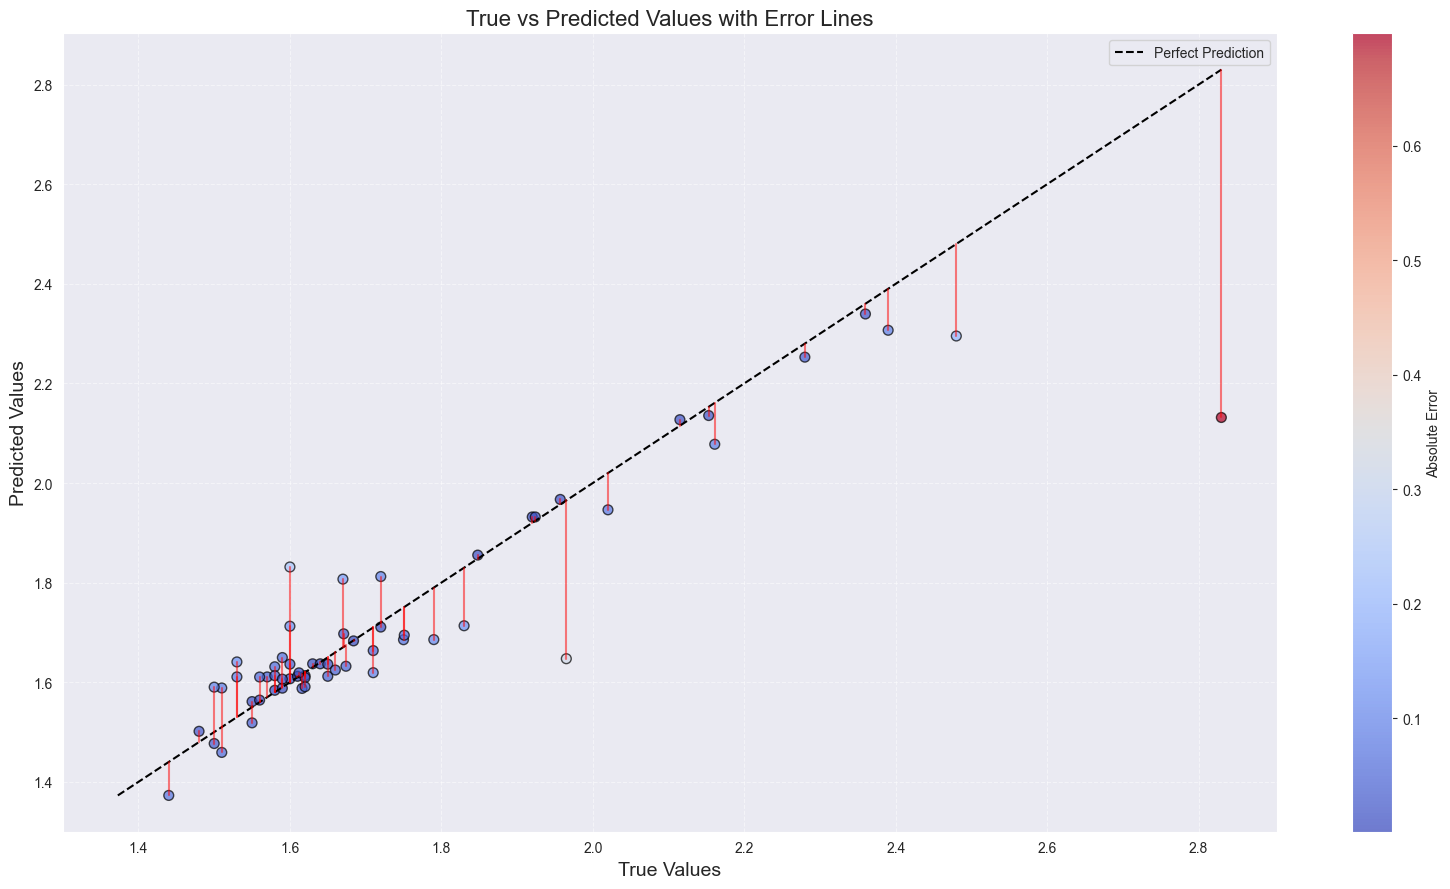

In [40]:
errors = np.abs(y_test - predictions)

plt.figure(figsize=(16, 9))
scatter = plt.scatter(y_test, predictions, c=errors, cmap='coolwarm', s=50, alpha=0.7, edgecolor='k')

min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

for i in range(len(y_test)):
    plt.plot([y_test.values[i], y_test.values[i]], [y_test.values[i], predictions[i]], 'r-', alpha=0.5)

plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('True vs Predicted Values with Error Lines', fontsize=16)
plt.colorbar(scatter, label='Absolute Error')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [42]:
# save model
from joblib import dump
dump(model, '../ml_models/xgboost_band_gap_3D.joblib')

['../ml_models/xgboost_band_gap_3D.joblib']